In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn-darkgrid')


from sklearn.datasets import fetch_openml

# Data Augmentation _ Shifting

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
np.set_printoptions(threshold=sys.maxsize, linewidth = 200) 

In [95]:
def mnist_shifter(data, direction = [2,4,6,8], stride = 1):
    '''Desciption
    * data : 3-d array inputs (n, 28, 28)
    * direction : list of shifting direction
    * stride : shifting size
    
    outputs = (data | all of shifting results)
    '''
    # single input processing
    if len(data.shape) == 2:
        data = data.reshape(1, 28, 28)
    # single direction processing
    if isinstance(direction, int):
        direction = [direction]
    
    d2, d8, d4, d6 = None, None, None, None
    
    for d in direction:
        # row-wise shifting
        if d == 2:
            d2 = np.concatenate((np.zeros((data.shape[0],stride,data.shape[2])),data[:,:-stride,:]), axis = 1)
        if d == 8:
            d8 = np.concatenate((data[:,stride:,:], np.zeros((data.shape[0],stride,data.shape[2]))), axis = 1)
        # column-wise shifting
        if d == 4:
            d4 = np.concatenate((data[:,:,stride:], np.zeros((data.shape[0],data.shape[1],stride))), axis = 2)
        if d == 6:
            d6 = np.concatenate((np.zeros((data.shape[0],data.shape[1],stride)), data[:,:,:-stride]), axis = 2)
    
    result_list = [data, d2, d8, d4, d6]
    result_notNone = tuple(i for i in result_list if isinstance(i, np.ndarray))
    
    # observation-wise concat
    return np.concatenate(result_notNone, axis = 0)

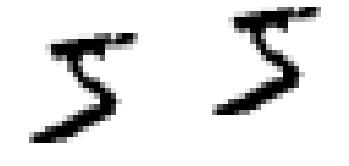

In [106]:
# example
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.subplot(121); plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.subplot(122); plt.imshow(mnist_shifter(some_digit_image,direction = 8, stride = 5)[1], cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [100]:
X_train_shift_2d = mnist_shifter(X_train.reshape(X_train.shape[0], 28, 28))
print(X_train_shift_2d.shape)

X_train_shift = X_train_shift_2d.reshape(X_train_shift_2d.shape[0],784)
print(X_train_shift.shape)

(300000, 28, 28)
(300000, 784)


In [108]:
# 늘어난 training feature수에 맞게 y를 extend 해준다.
y_train_ext = np.concatenate((y_train, y_train, y_train, y_train, y_train), axis = 0)

### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_shift_std = std_scaler.fit_transform(X_train_shift)
X_test_std = std_scaler.transform(X_test)

# Model
<br/>

### candidates
---
* SGD Classifier (logistic, SVM)
* random forest
* LGBM

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForest
from lightgbm import LGBMClassifier
from sklear.metrics import accuracy_score

In [ ]:
sgd_log = SGDClassifier(loss = "log", random_state = 42)
sgd_svm = SGDClassifier(loss = "hinge", random_state = 42)
rf = RandomForest(random_state = 42)
lgb = LGBMClassifier(random_state = 42)

model_list = [sgd_log, sgd_svm, rf, lgb]
score_list = []

for m in model_list:
    m.fit(X_train_shift_std, y_train_ext)
    pred = m.predict(X_test_std)
    score_list.append( accuracy_score(y_test,pred) )

print(model_list)
print(score_list)

In [ ]:
sgd_log.fit(X_train_shift_std, y_train_ext)
sgd_svm.fit(X_train_shift_std, y_train_ext)
rf.fit(X_train_shift_std, y_train_ext)
lgb.fit(X_train_shift_std, y_train_ext)